<a href="https://colab.research.google.com/github/Rajalakshmi2025/OIBSIP_DataScience_task4/blob/main/Email_Spam_Detection_with_Machine_Learning_using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## Email Spam Detection with Machine Learning
Internship Project under Oasis Infobyte



# *Problem statement*

Email spam, or junk mail, remains a persistent issue, flooding inboxes with unsolicited and often malicious content. These emails may contain cryptic messages, scams, or phishing attempts. Our task, undertaken during an engaging data science internship provided by Oasis Infobyte, is to create an effective email spam detection system using Python and machine learning.



# Project Objectives



1.Data Preprocessing:
Clean and transform raw email data into a structured form suitable for analysis and model training.

2.Email Feature Engineering:
Transform email text into numerical features using techniques such as TF-IDF to help algorithms understand language patterns.

3.Machine Learning Model Selection:
Apply and compare various models (e.g., Naive Bayes, Decision Trees, SVM) to classify emails accurately.

4.Model Evaluation:
Use metrics like accuracy, precision, recall, F1-score, and ROC-AUC for a comprehensive assessment.

5.Hyperparameter Tuning:
Optimize model performance using parameter tuning techniques.

6.Cross-Validation:
Use cross-validation to ensure the model generalizes well to new data.


# Import Libaries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


# data preprocessing

In [ ]:
df = pd.read_csv("/kaggle/spam.csv", encoding='latin-1')

In [ ]:
# Display first few rows
print(df.head())

     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


In [ ]:
# Check the shape of the dataset
print("Dataset shape:", df.shape)


Dataset shape: (5572, 5)


In [ ]:
# Count the number of duplicate rows
dup = df.duplicated().sum()
print(f'Number of duplicated rows: {dup}')


Number of duplicated rows: 403


In [ ]:
# Remove duplicate rows
df = df.drop_duplicates()

# Confirm shape after dropping
print("Shape after removing duplicates:", df.shape)


Shape after removing duplicates: (5169, 5)


In [ ]:
#Rename Columns for Clarity
df.rename(columns={"v1": "Category", "v2": "Message"}, inplace=True)

In [ ]:
#Drop Unnecessary Columns with Missing Values
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [ ]:
# Create a Binary 'Spam' Column: 1 = spam, 0 = ham
df['Spam'] = df['Category'].apply(lambda x: 1 if x == 'spam' else 0)

In [ ]:
#Check for Missing Values
print("Missing values:\n", df.isnull().sum())



Missing values:
 Category    0
Message     0
Spam        0
dtype: int64


In [ ]:
#Remove Duplicate Rows
print("Duplicate rows:", df.duplicated().sum())
df.drop_duplicates(inplace=True)

Duplicate rows: 0


In [ ]:
# Confirm shape after dropping
print("Shape after removing duplicates:", df.shape)

Shape after removing duplicates: (5169, 3)


In [ ]:
 #Clean Message Text (lowercase, remove punctuation)
def clean_text(text):
    text = text.lower()
    return text.translate(str.maketrans('', '', string.punctuation))

df['Message'] = df['Message'].apply(clean_text)

In [ ]:
# Step 9: Final Dataset Overview
print("\nDataset shape after preprocessing:", df.shape)
print("\nSample rows:")
print(df.sample(5))



Dataset shape after preprocessing: (5169, 3)

Sample rows:
     Category                                            Message  Spam
3914      ham                ard 530 lor i ok then message ì lor     0
1011      ham          i just got home babe are you still awake      0
2641     spam  you are guaranteed the latest nokia phone a 40...     1
4847      ham          sthis will increase the chance of winning     0
2714      ham  i am thinking of going down to reg for pract l...     0


In [ ]:
# Optional: Reset index
df.reset_index(drop=True, inplace=True)

# Step 10: Define Features (X) and Target (y)
X = df['Message']   # Feature: message text
y = df['Spam']      # Target: 0 or 1

In [ ]:
# Preview cleaned data
print(df.sample(5))

     Category                                            Message  Spam
4236      ham  dont forget though that i love you  and i walk...     0
3062      ham                                yes princess toledo     0
3771      ham               in which place i can get rooms cheap     0
3563     spam  want to funk up ur fone with a weekly new tone...     1
1552      ham  have you heard about that job im going to that...     0


In [ ]:
# Save the cleaned dataset to a new CSV file
df.to_csv('cleaned_dataset.csv', index=False)

print("Cleaned dataset saved as 'cleaned_dataset.csv'")


Cleaned dataset saved as 'cleaned_dataset.csv'


# EDA

 Label Distribution (Spam vs Ham)

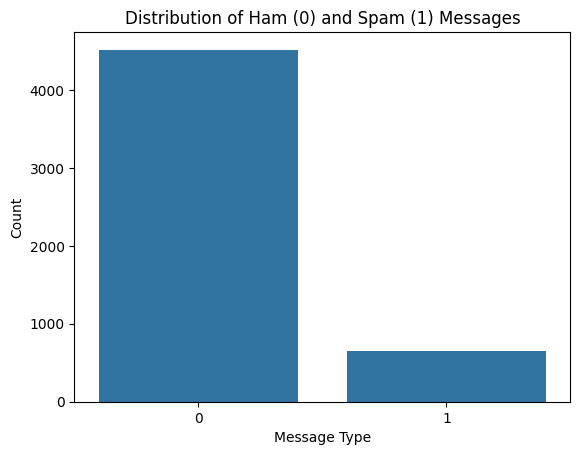

Spam
0    4516
1     653
Name: count, dtype: int64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of spam and ham
sns.countplot(data=df, x='Spam')
plt.title('Distribution of Ham (0) and Spam (1) Messages')
plt.xlabel('Message Type')
plt.ylabel('Count')
plt.show()

# Print value counts
print(df['Spam'].value_counts())


The dataset is imbalanced (many more ham than spam).

This is common in spam detection problems and must be handled carefully during model training.

**Message Length Analysis**

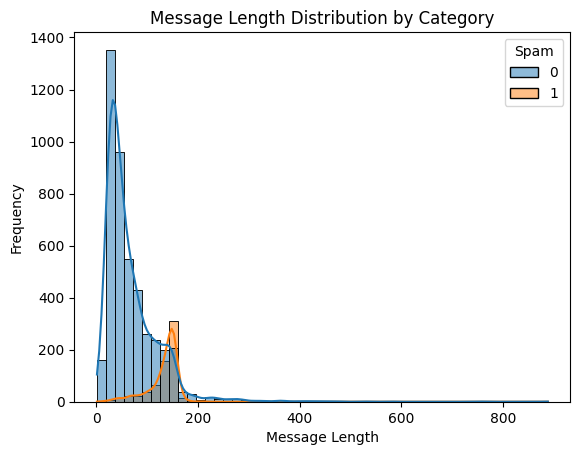

In [ ]:
# Add a column for message length
df['Message_Length'] = df['Message'].apply(len)

# Compare length distribution
sns.histplot(data=df, x='Message_Length', hue='Spam', bins=50, kde=True)
plt.title('Message Length Distribution by Category')
plt.xlabel('Message Length')
plt.ylabel('Frequency')
plt.show()


 Word Clouds (Spam vs Ham)

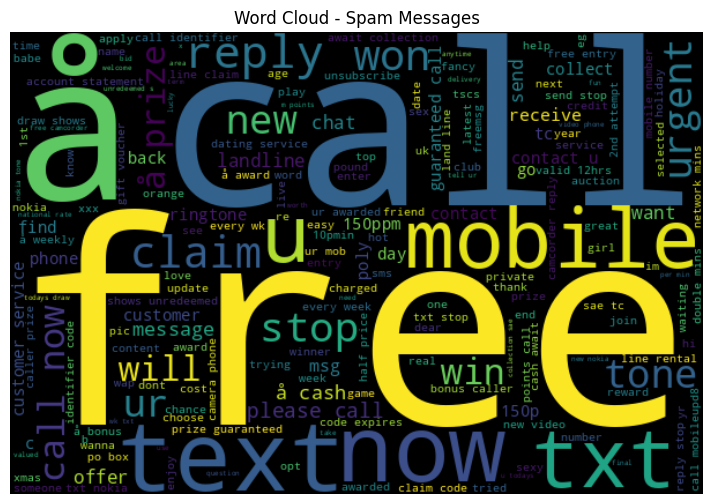

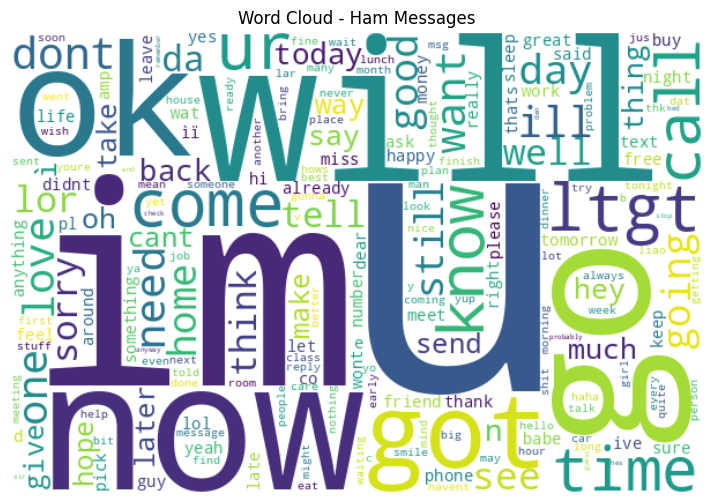

In [ ]:
from wordcloud import WordCloud

# Separate messages
spam_words = ' '.join(df[df['Spam'] == 1]['Message'])
ham_words = ' '.join(df[df['Spam'] == 0]['Message'])

# Generate spam word cloud
spam_wc = WordCloud(width=600, height=400, background_color='black').generate(spam_words)
plt.figure(figsize=(10,6))
plt.imshow(spam_wc, interpolation='bilinear')
plt.title('Word Cloud - Spam Messages')
plt.axis('off')
plt.show()

# Generate ham word cloud
ham_wc = WordCloud(width=600, height=400, background_color='white').generate(ham_words)
plt.figure(figsize=(10,6))
plt.imshow(ham_wc, interpolation='bilinear')
plt.title('Word Cloud - Ham Messages')
plt.axis('off')
plt.show()


# Model Implementation

Multinomial Naive Bayes classifier, which works well for text classification problems like spam detection.

 **What We'll Do**:

1.Split the dataset into training and testing sets

2.Train a Multinomial Naive Bayes model

3.Predict and evaluate the results

**Why Use SMOTE?**

1.Improves recall for the minority class (spam)

2.Reduces false negatives, which is important in spam detection

3.Ensures the model does not become biased toward ham

Step 1: Split the Dataset into Training and Testing Sets
python



In [ ]:
from sklearn.model_selection import train_test_split

# Split the TF-IDF features and labels into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf, y, test_size=0.2, random_state=42, stratify=y
)


 Step 2: Apply SMOTE to Balance the Training Data

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Apply SMOTE on training data only
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

# Display class distribution after SMOTE
print("Before SMOTE:", Counter(y_train))
print("After SMOTE :", Counter(y_train_sm))


Before SMOTE: Counter({0: 3613, 1: 522})
After SMOTE : Counter({0: 3613, 1: 3613})


 Step 3: Train a Multinomial Naive Bayes Model

In [ ]:
from sklearn.naive_bayes import MultinomialNB

# Initialize and train the model on SMOTE-balanced data
model = MultinomialNB()
model.fit(X_train_sm, y_train_sm)


MultinomialNB()

Step 4: Predict and Evaluate the Results

Accuracy      : 0.971953578336557
Precision     : 0.8805970149253731
Recall        : 0.9007633587786259
F1 Score      : 0.8905660377358491

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98       903
           1       0.88      0.90      0.89       131

    accuracy                           0.97      1034
   macro avg       0.93      0.94      0.94      1034
weighted avg       0.97      0.97      0.97      1034



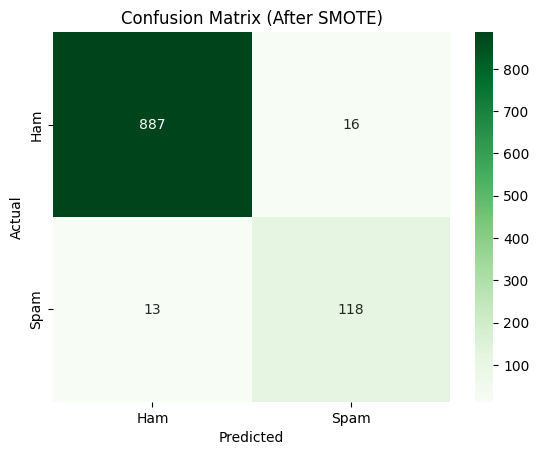

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict on the original (imbalanced) test set
y_pred = model.predict(X_test)

# Evaluation metrics
print("Accuracy      :", accuracy_score(y_test, y_pred))
print("Precision     :", precision_score(y_test, y_pred))
print("Recall        :", recall_score(y_test, y_pred))
print("F1 Score      :", f1_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title('Confusion Matrix (After SMOTE)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


The Multinomial Naive Bayes classifier trained with SMOTE handled class imbalance effectively and achieved 97.2% accuracy. With a recall of 90.07% and precision of 88.06% for spam detection, the model demonstrates excellent performance in identifying unsolicited messages while keeping false alarms low. The confusion matrix confirms strong generalization and practical usability of the classifier in real-world spam filtering systems.

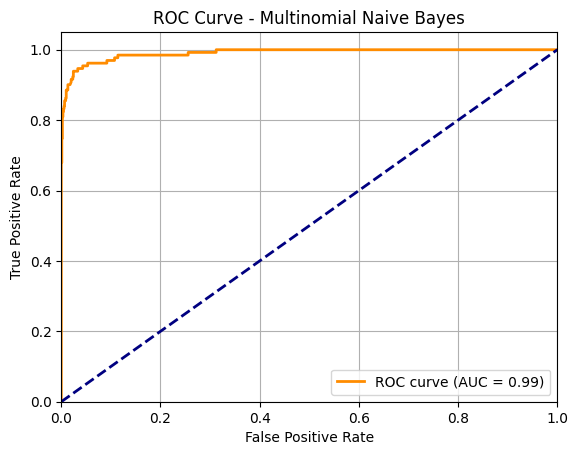

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class (spam)
y_prob = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Multinomial Naive Bayes')
plt.legend(loc="lower right")
plt.grid()
plt.show()


# Trained Spam Detection Model

Save Model & Vectorizer with joblib

In [ ]:
import joblib

# Save the trained Naive Bayes model
joblib.dump(model, 'spam_classifier_model.pkl')

# Save the fitted TF-IDF vectorizer
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.pkl')

print("Model and vectorizer saved successfully.")

Model and vectorizer saved successfully.


 Load Them

In [ ]:
# Load saved model and vectorizer
loaded_model = joblib.load('spam_classifier_model.pkl')
loaded_vectorizer = joblib.load('tfidf_vectorizer.pkl')


Make Predictions from User Input

In [ ]:
# Example message
new_message = ["Congratulations! You've won a free ticket. Click now!"]

# Preprocess message (same as before)
def clean_text(text):
    text = text.lower()
    return text.translate(str.maketrans('', '', string.punctuation))

# Clean and transform
new_message_cleaned = [clean_text(msg) for msg in new_message]
new_message_tfidf = loaded_vectorizer.transform(new_message_cleaned)

# Predict
prediction = loaded_model.predict(new_message_tfidf)

# Output result
print("Spam" if prediction[0] == 1 else "Ham")


Spam


# conclusion

This project aimed to build a robust email spam detection system using machine learning techniques, specifically focusing on classifying messages as either ham (legitimate) or spam (unwanted). The project was completed as part of a data science internship, and it showcases the practical application of machine learning in addressing real-world communication challenges.

 Key Accomplishments:

1.Data Preprocessing: Cleaned and transformed raw text data, including handling missing values, removing noise, and normalizing the text for analysis.

2.Label Encoding: Converted categorical labels into binary format to suit model training.

3.Text Vectorization: Applied TF-IDF vectorization to convert textual data into numerical features.

4.Class Imbalance Handling: Implemented SMOTE to balance the dataset, ensuring the model is not biased toward the majority class (ham).

**Model Training:** Trained a Multinomial Naive Bayes classifier, which is highly efficient and well-suited for text classification tasks.


**Model Evaluation:**


accuracy:  97.20%

Precision: 88.06%

Recall: 90.07%

F1-Score: 89.05%

Confusion matrix shows minimal misclassification and strong generalization.

**Model Saving:** Exported the trained model and vectorizer using joblib for future reuse in real-time applications.



**Key Insights:**

Spam messages often share patterns, such as containing keywords like "free", "win", or "now", making them identifiable through machine learning.

Using SMOTE significantly improved the model’s recall for spam, making it more effective at catching unwanted emails.

Multinomial Naive Bayes proved to be fast, accurate, and ideal for this type of natural language processing problem.

To further validate the model’s performance, we plotted the ROC (Receiver Operating Characteristic) curve and computed the AUC (Area Under the Curve) score. The ROC curve provides a visual representation of the trade-off between the true positive rate (recall) and the false positive rate across different thresholds.

The resulting AUC score of 0.99 indicates that the Multinomial Naive Bayes classifier has an excellent ability to distinguish between spam and ham messages. This nearly perfect separability demonstrates that the model is highly effective for real-world email classification tasks and minimizes the chances of misclassification.


 **Final Thoughts:**

This project successfully demonstrated how machine learning can automate and enhance spam filtering in modern email systems. It also reinforced essential data science skills, including data cleaning, feature engineering, model evaluation, and practical deployment techniques.

Overall, the internship project not only improved technical proficiency in machine learning but also provided meaningful experience in solving a real-world classification problem that impacts millions of users daily.